In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [10]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
# Створення архітектури моделі
model = models.Sequential()

# Додавання шарів
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Додаємо Dropout для регуляризації
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Виведення графіків навчання
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

Epoch 1/10
750/750 [==============================] - 11s 13ms/step - loss: 0.7158 - accuracy: 0.7326 - val_loss: 0.4402 - val_accuracy: 0.8316
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.4408 - accuracy: 0.8386 - val_loss: 0.3540 - val_accuracy: 0.8659
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.3705 - accuracy: 0.8657 - val_loss: 0.3181 - val_accuracy: 0.8810
Epoch 4/10
750/750 [==============================] - 9s 13ms/step - loss: 0.3294 - accuracy: 0.8829 - val_loss: 0.3014 - val_accuracy: 0.8893
Epoch 5/10
750/750 [==============================] - 9s 13ms/step - loss: 0.2991 - accuracy: 0.8929 - val_loss: 0.2801 - val_accuracy: 0.8969
Epoch 6/10
750/750 [==============================] - 10s 14ms/step - loss: 0.2761 - accuracy: 0.9003 - val_loss: 0.2665 - val_accuracy: 0.9032
Epoch 7/10
750/750 [==============================] - 10s 14ms/step - loss: 0.2574 - accuracy: 0.9074 - val_loss: 0.2582 - val_accuracy: 0.9

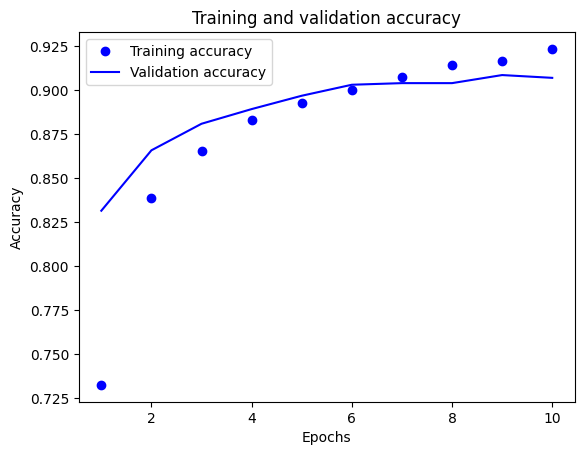

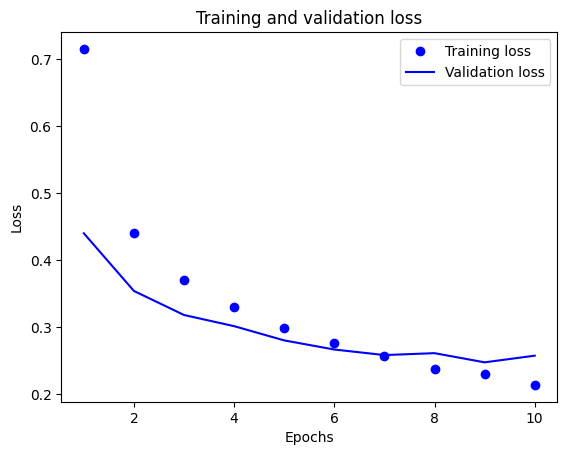

In [17]:
# Графік точності
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Графік втрат
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
# Отримання прогнозів для тестових даних
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = tf.argmax(test_labels, axis=1).numpy()

# Виведення метрик якості для кожного класу
print(classification_report(true_labels, predicted_labels))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.91      0.79      0.85      1000
           3       0.87      0.92      0.89      1000
           4       0.82      0.88      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.73      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [20]:
#Точність між багатошарової та згорткової нейромережі майже однакові, мені здається це залежить від маніпуляцій з параметрами мережі.